# Generate seurat object


In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
from scipy import sparse



sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

## Load data for samples of interest

In [4]:
path_to_data = '/nfs/team292/lg18/endometriosis/integrated_objects/cells_integrated.h5ad'
adata = sc.read(path_to_data)
adata.obs.head()

,n_genes,sample,library,StudyName,SampleID,Lane,Processing,Type,BiopsyType,BiopsyType_II,...,Mareckova_celltype,Mareckova_epi_celltype,Mareckova_mesen_celltype,Biopsy_type,Tissue_sampled,Spatial_location,Ectopic_group,BiopsyType_old,Endometrial_pathology,Age
HCA_A_RepT_RNA13247830_AAACCTGAGCGATGAC-Mareckova,1981,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,Mesen_mPV,NaN,PVe_STEAP4,Whole_Uterus,eutopic_endometrium,NaN,NaN,Organ_Donor,C,37
HCA_A_RepT_RNA13247830_AAACCTGAGCTAGGCA-Mareckova,3492,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,Mesen_dS,NaN,eS,Whole_Uterus,eutopic_endometrium,NaN,NaN,Organ_Donor,C,37
HCA_A_RepT_RNA13247830_AAACCTGAGGCAGTCA-Mareckova,4832,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,Epithelial_Prolif,NaN,NaN,Whole_Uterus,eutopic_endometrium,NaN,NaN,Organ_Donor,C,37
HCA_A_RepT_RNA13247830_AAACCTGCACCAACCG-Mareckova,2967,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,Endothelial,NaN,NaN,Whole_Uterus,eutopic_endometrium,NaN,NaN,Organ_Donor,C,37
HCA_A_RepT_RNA13247830_AAACCTGCACCTGGTG-Mareckova,2597,HCA_A_RepT_RNA13247830,HCA_A_RepT_RNA13247830,CBTM,HCA_A_RepT_RNA13247830,0.0,Fresh,Cells,Organ_Donor,NaN,...,Mesen_mPV,NaN,PVe_STEAP4,Whole_Uterus,eutopic_endometrium,NaN,NaN,Organ_Donor,C,37


In [5]:
new_names = {'cDC1':'cDC1',
 'Red_Blood_Cell':'Red_blood_cell',
 'T_Reg':'T_Reg',
 'eM2':'eM2',
 'CD8_T':'T_cell_CD8',
 'uNK1':'uNK1',
 'Monocyte':'Monocyte',
 'pDC':'pDC',
 'ILC3':'ILC3',
 'Doublet':'Doublet',
 'eM1':'eM1',
 'uNK2':'uNK2',
 'uNK3':'uNK3',
 'cDC2':'cDC2',
 'CD4_T':'T_cell_CD4',
 'B_Cell':'B_cell',
 'Peripheral_Lymphocyte':'Peripheral_lymphocyte',
 'Cycling_T_Cell':'T_cell_cycling',
 'Mast_Cell':'Mast_cell',
 'Plasma_B_Cell':'Plasma_B_cell',
 'Cycling_uNK1':'uNK1_cycling'}

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (13,15,17,18,19,21,22,23,24,25,41,42,46,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical


T_cell_CD8               5580
uNK2                     4370
T_cell_CD4               4297
eM1                      3854
uNK3                     3716
uNK1                     1644
eM2                      1643
B_cell                   1163
Doublet                  1114
Peripheral_lymphocyte    1099
ILC3                      869
uNK1_cycling              741
cDC2                      693
T_Reg                     667
Monocyte                  647
Mast_cell                 465
T_cell_cycling            331
pDC                       223
cDC1                      188
Plasma_B_cell              89
Red_blood_cell             43
Name: celltype, dtype: int64


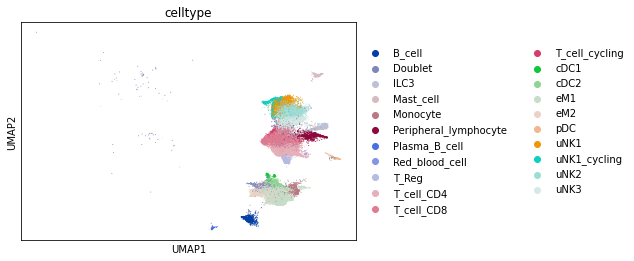

In [6]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)
annot_df['immune_subcluster_labels'] = annot_df.immune_subcluster_labels.map(new_names)
annot_df.head()
annot = annot_df['immune_subcluster_labels'].to_dict()


adata = adata[annot_df.index]
adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())
sc.pl.umap(adata, color=['celltype'])

### Exclude unwanted clusters

In [7]:
adata = adata[[ i not in ['Doublet'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'cycling' not in i for i in adata.obs['celltype'] ]]
print(adata.obs['celltype'].value_counts())

T_cell_CD8               5580
uNK2                     4370
T_cell_CD4               4297
eM1                      3854
uNK3                     3716
uNK1                     1644
eM2                      1643
B_cell                   1163
Peripheral_lymphocyte    1099
ILC3                      869
cDC2                      693
T_Reg                     667
Monocyte                  647
Mast_cell                 465
pDC                       223
cDC1                      188
Plasma_B_cell              89
Red_blood_cell             43
Name: celltype, dtype: int64


### Subset to Ctrl donors in either prolif/secretory phase

In [8]:
adata = adata[[ 'Tan' not in i for i in adata.obs['dataset'] ]]
adata = adata[[ i in ['Secretory', 'Proliferative'] for i in adata.obs['Binary Stage'] ]]
set(adata.obs['Binary Stage'] )

{'Proliferative', 'Secretory'}

In [9]:
adata = adata[[ i in ['Ctrl_Superficial'] for i in adata.obs['Group'] ]]
set(adata.obs['Group'] )

{'Ctrl_Superficial'}

In [10]:
adata.X.shape

(10312, 17736)

In [11]:
pd.crosstab(adata.obs['Binary Stage'], adata.obs.celltype )

celltype,B_cell,ILC3,Mast_cell,Monocyte,Peripheral_lymphocyte,Plasma_B_cell,Red_blood_cell,T_Reg,T_cell_CD4,T_cell_CD8,cDC1,cDC2,eM1,eM2,pDC,uNK1,uNK2,uNK3
Binary Stage,,,,,,,,,,,,,,,,,,
Proliferative,75,187,29,66,193,54,38,121,1113,1483,35,144,231,393,87,105,718,664
Secretory,131,215,13,57,270,3,2,51,596,822,36,89,221,188,28,399,631,824


In [12]:
import pickle   

fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/cells_immune_integrated_X_scVI.obj', 'rb')
X_scVI = pickle.load(fileObj)
adata.obsm['X_scVI'] = X_scVI
fileObj.close()

fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/cells_immune_integrated_X_umap.obj', 'rb')
X_umap = pickle.load(fileObj)
adata.obsm['X_umap'] = X_umap
fileObj.close()

# Move to Seurat

In [13]:
import anndata
adataDown = adata.copy() #[[ i in ["G1"] for i in adata_proliferative.obs.phase ]]
sc.pp.filter_cells(adataDown, min_genes=1000)
sc.pp.filter_genes(adataDown, min_cells=5)

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [14]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython


In [15]:
# This is just to allow moving adata to R without errors
adataDown.X = adataDown.X.toarray()

idx = ['n_genes', 'sample',  'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 
       'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet']
for i in idx:
    del adataDown.obs[i]
    
adataDown.obs['celltype'] = adataDown.obs['celltype'].astype(str)

# del adataDown.obsm['X_scVI']
# del adataDown.obsm['X_umap']
del adataDown.obsp['connectivities']
del adataDown.obsp['distances']
del adataDown.uns

In [16]:
%%R -i adataDown
adataDown

class: SingleCellExperiment 
dim: 16255 9809 
metadata(0):
assays(1): X
rownames(16255): A1BG A2M ... ZYX ZZEF1
rowData names(220): gene_ids.0.Fonseca feature_types.0.Fonseca ...
  highly_variable_nbatches n_cells
colnames(9809): UA_Endo9426399_AAACCCAGTCTAATCG-Mareckova
  UA_Endo9426399_AAACCCATCCTACCAC-Mareckova ...
  GSM5572240_TTTGATCAGTGTAGAT-Lai GSM5572240_TTTGGAGCAAGAGAGA-Lai
colData names(57): library StudyName ... Age celltype
reducedDimNames(2): X_scVI UMAP
altExpNames(0):


In [17]:
%%R

library(Seurat)
seurat_andata = as.Seurat(adataDown, counts = "X", data = "X")
Idents(seurat_andata) = seurat_andata$celltype

saveRDS(seurat_andata, "/nfs/team292/lg18/endometriosis/MiloR_objects/cells_immune_integrated.rds")

In [ ]:
sc.pl.umap(adata, color=['celltype'])